In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [5]:
df=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df=df.iloc[:,2:]

In [7]:
df.drop('Title',axis=1,inplace=True)

In [8]:
df['sentiment']=df['Rating'].apply(lambda x: 1 if x>3 else 0)

In [9]:
text_clf_nb=Pipeline([('tfidf',TfidfVectorizer()),('clf',MultinomialNB())])
text_clf_svm=Pipeline([('tfidf',TfidfVectorizer()),('clf',LinearSVC())])

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Review Text'],df.sentiment,test_size=0.10)

In [13]:
df.dropna(inplace=True)

In [39]:
text_clf_nb.fit(x_train,y_train)
text_clf_svm.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [40]:
pred_nb=text_clf_nb.predict(x_test)
pred_svm=text_clf_svm.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [41]:
accuracy_score(y_test,pred_nb)

0.794078656650464

In [42]:
accuracy_score(y_test,pred_svm)

0.8842244807777286

In [43]:
confusion_matrix(y_test,pred_nb)

array([[  36,  466],
       [   0, 1761]], dtype=int64)

In [44]:
confusion_matrix(y_test,pred_svm)

array([[ 326,  176],
       [  86, 1675]], dtype=int64)

In [46]:
df['Review Text'][1750]

"This is a very nice dress. the jersey is soft and high quality. the construction appears solid. the color is very pretty, and looks in real life just like it does on my computer. the cut and draping just don't work for me. there's just too much draping, too much fabric. it overwhelmed me and made me look bigger than i am. i have a feeling this would be much more flattering on a curvier figure than my own. this dress seemed to be trying to accentuate curves i don't really have (especially in the"

In [47]:
print(text_clf_svm.predict([df['Review Text'][1750]]))

[0]


# visualization portion(overall view)

In [48]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1


Text(0.5, 0, 'Age')

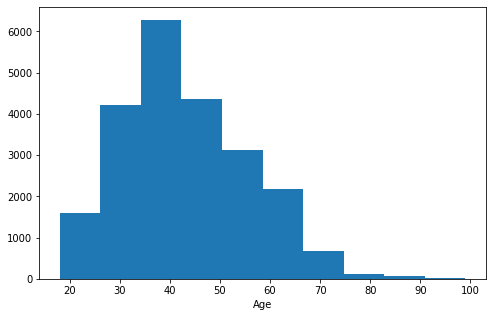

In [115]:
plt.figure(figsize=(8,5))
plt.hist(df.Age,bins=10)
plt.xlabel('Age')

### This shows that customers of age between 25 to 65 can be focused for better sales.

In [51]:
df.groupby('sentiment').size()

sentiment
0     5193
1    17435
dtype: int64

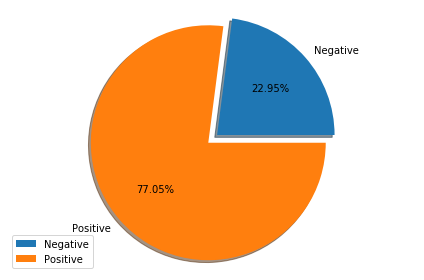

In [54]:
plt.pie(df.groupby('sentiment').size(),labels=['Negative','Positive'],explode=(0.1,0),radius=1,autopct='%0.2f%%',shadow=True)
plt.legend(loc='lower left')
plt.tight_layout()
plt.axis('equal')
plt.show()

### Overall almost 77% are positive review and 23% are negative

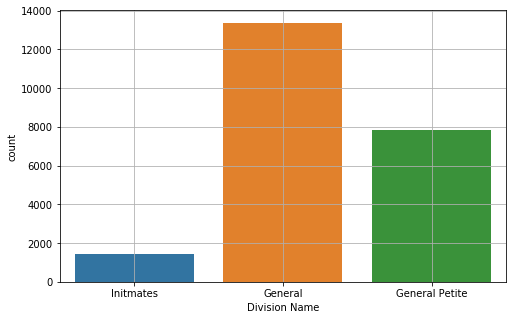

In [63]:
plt.figure(figsize=(8,5))
sns.countplot(df['Division Name'],data=df)
plt.grid()

### This shows that more than 12000 products are sold under 'General', 8000 products are sold under 'General 
### Petite' 
### and approx 1500 products are sold under 'Initmates' among the all sold products

# Go inshigt of the dataset

## For Initmates divison

In [65]:
initmates=df[df['Division Name']=='Initmates']

In [67]:
initmates.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,1
13,44,Bought the black xs to go under the larkspur m...,5,1,0,Initmates,Intimate,Intimates,1
25,31,"Loved the material, but i didnt really look at...",3,0,0,Initmates,Intimate,Lounge,0
28,53,I have several of goodhyouman shirts and i get...,5,1,2,Initmates,Intimate,Lounge,1
34,39,This is such a neat dress. the color is great ...,5,1,0,Initmates,Intimate,Lounge,1


Text(0.5, 0, 'Age')

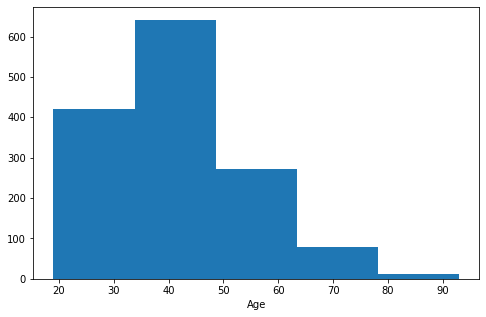

In [117]:
plt.figure(figsize=(8,5))
plt.hist(initmates.Age,bins=5)
plt.xlabel('Age')

### age group is concentrated mainly between 20 to 60 years

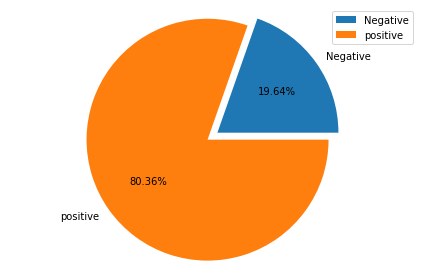

In [94]:
plt.pie(initmates.groupby('sentiment').size(),labels=['Negative','positive'],explode=(0.1,0),radius=1,autopct='%0.2f%%',shadow=False)
plt.legend(loc='upper right')
plt.axis('equal')
plt.tight_layout()
plt.show()

### For Intimate division almost 80% is positive review.

In [73]:
import re,string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

D:\Anaconda3\envs\Deep_learning\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [79]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    return text
def CleanTokenize(df):
    head_lines = list()
    lines = initmates["Review Text"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

In [76]:
!pip install wordcloud

  Using cached wordcloud-1.7.0-cp37-cp37m-win_amd64.whl (157 kB)


(-0.5, 999.5, 499.5, -0.5)

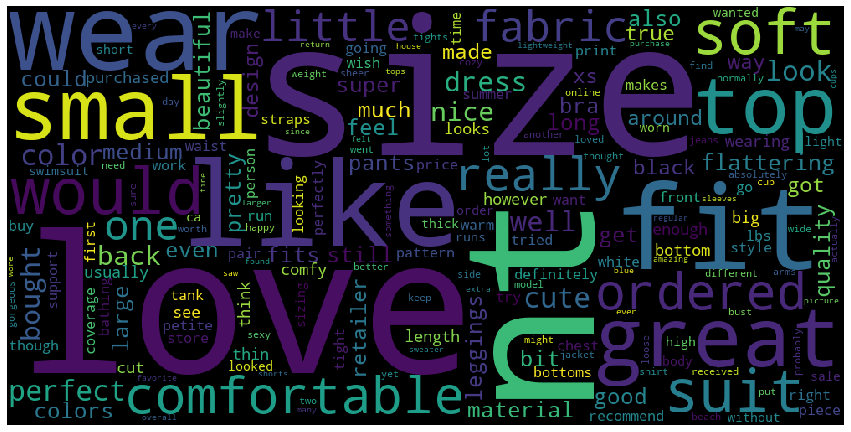

In [80]:
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
pos_data = initmates.loc[initmates['sentiment'] == 1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

### this words are mostly highlighted

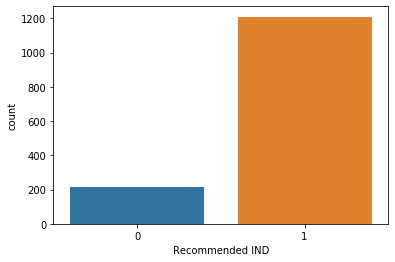

In [86]:
sns.countplot(initmates['Recommended IND'],data=initmates)

### total almost 1200 people has recomended to others

# For General division

In [87]:
general=df[df['Division Name']=='General']

In [88]:
general.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,1
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,1
5,49,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,0
8,24,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,1


Text(0.5, 0, 'Age')

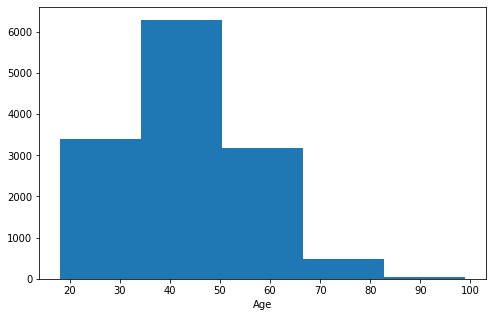

In [91]:
plt.figure(figsize=(8,5))
plt.hist(general.Age,bins=5)
plt.xlabel('Age')

### age group from 20 to 65 can be targeted for more sales

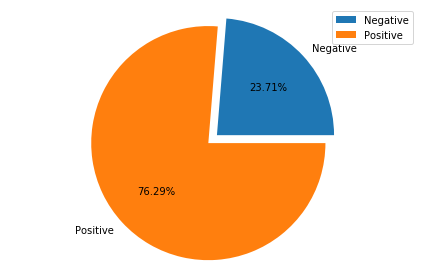

In [93]:
plt.pie(general.groupby('sentiment').size(),labels=['Negative','Positive'],radius=1,explode=(0.1,0),autopct='%0.2f%%')
plt.axis('equal')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### almost 76% is positive reviews and 24% is negative

In [95]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    return text
def CleanTokenize(df):
    head_lines = list()
    lines = general["Review Text"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

(-0.5, 999.5, 499.5, -0.5)

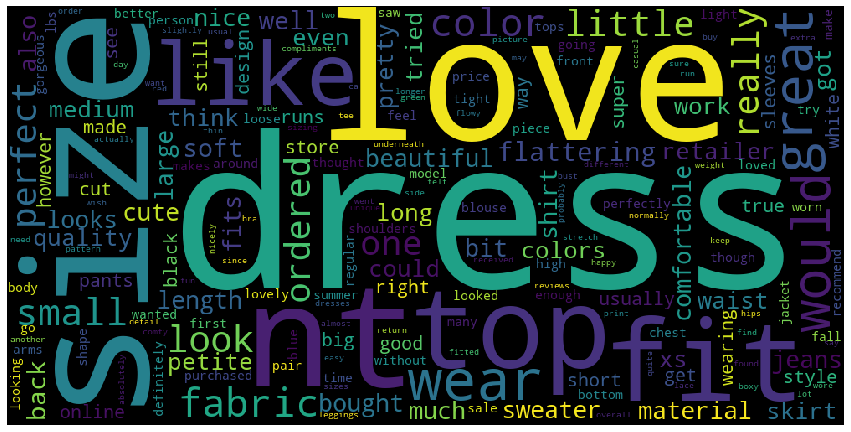

In [96]:
pos_data = general.loc[general['sentiment'] == 1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

### these are the most occurance words

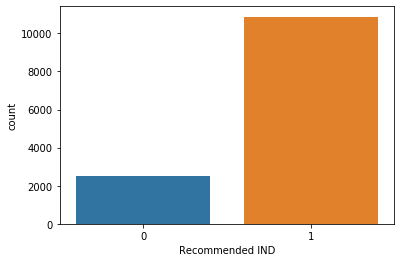

In [118]:
sns.countplot(general['Recommended IND'],data=initmates)

### from General divison more than 10k people refer

# For General Petite devision

In [97]:
general_petite=df[df['Division Name']=='General Petite']

In [98]:
general_petite.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,1
6,39,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,1
7,39,"I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,1
11,39,This dress is perfection! so pretty and flatte...,5,1,2,General Petite,Dresses,Dresses,1
12,53,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,1


Text(0.5, 0, 'Age')

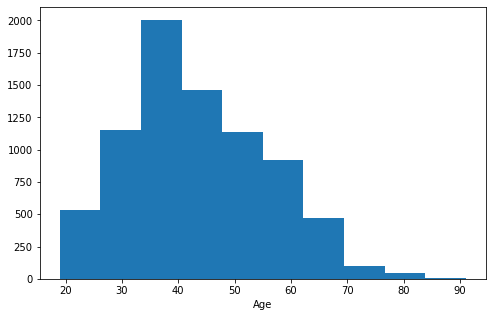

In [104]:
plt.figure(figsize=(8,5))
plt.hist(general_petite.Age,bins=10)
plt.xlabel('Age')

### customers of age group between 30 to 60 years can be targeted

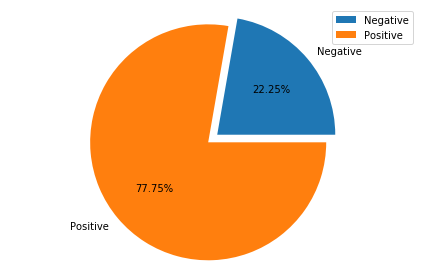

In [105]:
plt.pie(general_petite.groupby('sentiment').size(),labels=['Negative','Positive'],radius=1,explode=(0.1,0),autopct='%0.2f%%')
plt.axis('equal')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### review says that almost 78% are postive review given by customers

In [106]:
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    return text
def CleanTokenize(df):
    head_lines = list()
    lines = general_petite["Review Text"].values.tolist()

    for line in lines:
        line = clean_text(line)
        # tokenize the text
        tokens = word_tokenize(line)
        # remove puntuations
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        # remove non alphabetic characters
        words = [word for word in stripped if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        # remove stop words
        words = [w for w in words if not w in stop_words]
        head_lines.append(words)
    return head_lines

(-0.5, 999.5, 499.5, -0.5)

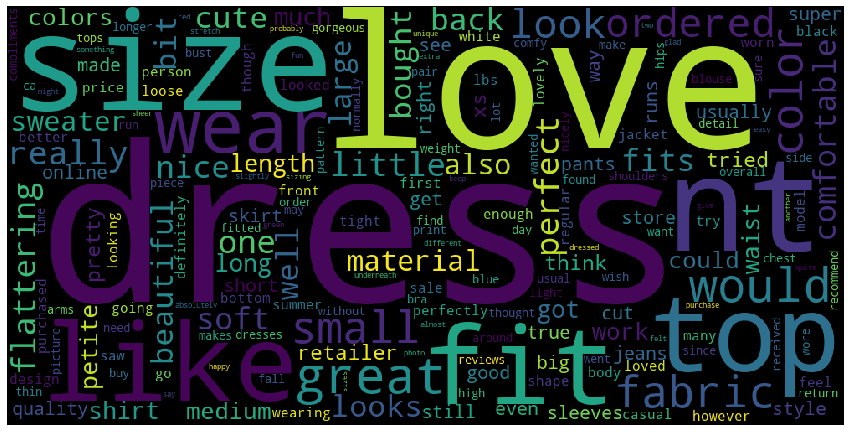

In [107]:
pos_data = general_petite.loc[general_petite['sentiment'] == 1]
pos_head_lines = CleanTokenize(pos_data)
pos_lines = [j for sub in pos_head_lines for j in sub] 
word_could_dict=Counter(pos_lines)

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")

### these are the most common words

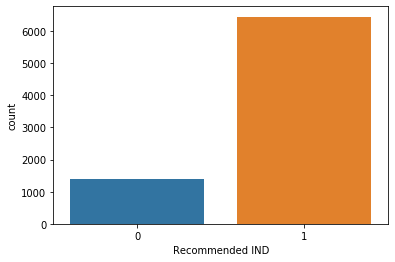

In [119]:
sns.countplot(general_petite['Recommended IND'],data=initmates)

### more than 6000 people recomonded